<a href="http://landlab.github.io"><img style="float: left" 
src="https://avatars3.githubusercontent.com/u/7543483?s=200&v=4"></a>



## Reuse Ecohydrology Model with Gridded Hydrometeorology Forcing 

* Define a geographic subset (New Mexico) within the North America and download gridded meteorological data for this region. (for brevity, this is done in a supplemental notebook)
* Calculate mean climatology for a range of elevation bands.
* Run the Landlab ecohydrology model for a watershed given various climate scenarios.<br />
* Observe sensitivity to climate by comparing the watershed model results. <br />
<hr> <small> 

## To run this notebook:

Click in or on each shaded code block below and use ***shift + enter*** or ***shift + return*** keys. Alternatively, you can run groups of cells by clicking ***Cell*** on the menu above and selecting among the various run options. This is also where you can clear outputs from previous runs.

If an error occurs, click on ***Kernel*** and then select ***Restart and Clear Outputs*** in the menu above. While exiting the notebook, click ***File*** and then select ***Close and Halt***.
<br />For more instructions on how to run an interactive IPython notebook, click here: <a href="https://github.com/landlab/tutorials/blob/master/README.md">https://github.com/landlab/tutorials/blob/master/README.md</a></small><br>
<small>For tutorials on learning Landlab, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a></small>
<br>
<small>For the unexpanded version to download and run, click here: <a href="http://nbviewer.jupyter.org/github/landlab/tutorials/blob/master/ecohydrology/cellular_automaton_vegetation_DEM/cellular_automaton_vegetation_DEM_unexpanded.ipynb">http://nbviewer.jupyter.org/github/landlab/tutorials/blob/master/ecohydrology/cellular_automaton_vegetation_DEM/cellular_automaton_vegetation_DEM_unexpanded.ipynb</a></small><br>

## 1. Introduction

** 1.1 Landlab Ecohydrology Model**

In this tutorial you will explore the role of climatology on the spatial development of tree, shrub, and grass Plant Functional Types (PFTs) in a semiarid setting. You will run an ecohydrologic vegetation dynamics model, written using Landlab - a python toolkit for modeling earth surface processes, on a hypothetical flat watershed with varied climatology. The ecohydrologic vegetation dynamics model you will use is based on CATGraSS, a discrete time cellular automata (CA) model for spatial evolution of PFTs [Zhou et al., 2013].  Each cell in the domain can be occupied by a single PFT: Tree, Shrub, Grass or left unoccupied as bare soil. The model couples local ecohydrologic vegetation dynamics, which simulate biomass production based on local soil moisture and actual evapotranspiration, with spatial processes for plant establishment and mortality controlled by seed dispersal rules, water stress tolerance, and space availability (Figure 1). Tree and shrub plants disperse seeds to their neighbors. Grass seeds are assumed to be available at each cell. Establishment of plants in empty cells is determined probabilistically based on water stress of each PFT. Plants with lower water stress have higher probability of establishment. Plant mortality is simulated probabilistically as a result of aging and drought stress.

![CATGraSSFlowChart](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/figures/CATGraSSFlowChart.jpeg)
<center>**Figure 1.** Ecohydrologic vegetation dynamics model [Modified from Zhou et al., 2013]</center>

The model is driven by rainfall pulses (observed or generated), solar radiation and temperature. The latter two variables can also be used to prescribe a seasonal potential evapotranspiration input. In Landlab, the model is implemented as a set of interacting components, each describing a different element of the coupled system: PrecipitationDistribution, Radiation, PotentialEvapotranspiration, SoilMoisture, Vegetation (component for local vegetation growth), and VegCA (component for cellular automaton establishment and mortality of PFTs, i.e. spatial dynamics of vegetation pattern evolution). Each process can also operate in isolation, outside the context of this example model. Landlab components and the flow chart used to couple the components in the model driver is given below [Hobley et al., 2017]. 


![CATGraSSComponents](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/figures/CATGraSSComponents.jpg)
<center>**Figure 2.** Landlab components (left column) and the flow chart of their implementation in Landlab to develop the cellular automaton plant competition model [Hobley et al. 2017]</center>

This model is available as a function 'run_ecohydrology_model', that can be imported from python script 'supporting_files/ecohydrology_model_functions.py'. It contains [Ref. Figure 2]:
  - A local vegetation dynamics model that simulates storm and inter-storm water balance and ecohydrologic fluxes (ET, runoff), and plant biomass dynamics by coupling the following components:
        - PrecipitationDistribution
        - Radiation
        - PotentialEvapotranspiration
        - SoilMoisture
        - Vegetation

  - A spatially explicit probabilistic cellular automaton component that simulates plant competition by tracking establishment and mortality of plants based on soil moisture stress:
        - VegCA
    

**References**:

Phuong, J., Bandaragoda C., Istanbulluoglu, E., Beveridge, C., Strauch, R., Setiawan, L., Mooney, S. D. (in-review). Automated retrieval, preprocessing, and visualization of gridded hydrometeorology data products for spatial-temporal exploratory analysis and intercomparison.

Hobley, D. E. J., Adams, J. M., Nudurupati, S. S., Hutton, E. W. H., Gasparini, N. M., Istanbulluoglu, E., and Tucker, G. E. (2017). Creative computing with Landlab: an open-source toolkit for building, coupling, and exploring two-dimensional numerical models of Earth-surface dynamics, Earth Surf. Dynam. doi:10.5194/esurf-5-21-2017.

Livneh B., T.J. Bohn, D.S. Pierce, F. Munoz-Ariola, B. Nijssen, R. Vose, D. Cayan, and Brekke, L.D. (2015). A spatially comprehensive, hydrometeorological data set for Mexico, the U.S., and southern Canada 1950-2013, Nature Scientific Data, 5:150042, doi:10.1038/sdata.2015.42.

Zhou, X., Istanbulluoglu, E., & Vivoni, E. R. (2013). Modeling the ecohydrological role of aspect‐controlled radiation on tree‐grass‐shrub coexistence in a semiarid climate. Water Resources Research, 49(5), 2872-2895.

Rodriguez-Iturbe, I. (2000). Ecohydrology: A hydrologic perspective ofclimate-soil-vegetation dynamics, Water Resour. Res., 36(1), 3–9.

Eagleson, P. S. (1982). Ecological optimality in water-limited natural soilvegetation systems: 1. Theory and hypothesis, Water Resour. Res.,18(2), 325–340.

Moore D. (2011). Meteorology Data from the Sevilleta National Wildlife Refuge, New Mexico (1988- present). Environmental Data Initiative. https://doi.org/10.6073/pasta/4d71c09b242602114fb684c843e9d6ac.

** 1.2 Landscape **

In this tutorial, we are going to work with a hypothetical rectangular domain over which we will impose elevation-dependent climatology from New Mexico, USA to simulate vegetation patterns using the ecohydrologic model discussed in Figure 1 and 2. The climate in this area is semi-arid with Mean Annual Precipitation (MAP) in the range 200 - 350 mm depending on the elevation.

The steps used for downloading gridded meteorology data and processing it are included in a separate Notebook in this Hydroshare resource [New Mexico Climate Data Notebook](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/ogh_newmexico/observatory_gridmet_newmexico.ipynb), and imported as part of this exercise.

** 1.3 Steps to Explore the Model** 

We will do the following: 
- Import and review a pre-processed gridded hydroclimatology data dictionary for three different elevation bands. 
- Run the coupled Ecohydrology and cellular automata plant competition model for ~250 years for a daily timestep. 
- Visualize and examine spatio-temporal outputs.

Start at the top by reading each block of text and sequentially running each code block (put your curser in a code block and type shift + enter OR got to the _Cell_ pulldown menu at the top and choose _Run Cells_). 

Remember that you can always go to the _Kernel_ pulldown menu at the top and choose _Restart & Clear Output_ or _Restart & Run All_ if you change things and want to start afresh. 



## 2.0 Data Science & Cyberinfrastructure Methods

### 2.1 Data Science Methods

** 2.1.1 Import Landlab components, functions for importing data, plotting tools, and HydroShare utilities **

To run this notebook, we must import several libraries.
The hs_utils library provides functions for interacting with HydroShare, including resource querying, dowloading. and creation. Additional libraries support the functions of Landlab.

In [2]:
#Landlab toolkit available on CUAHSI JupyterHub 
from landlab import RasterModelGrid as rmg

#Python libraries available on CUAHSI JupyterHub 
import os
import pandas as pd, numpy as np, dask, json
from datetime import datetime, timedelta
import geopandas as gpd

# plotting and shape libraries
%matplotlib inline
import matplotlib.pyplot as plt

# tools for processing gridded hydro-meteorology data
import ogh

# silencing warning
import warnings 
warnings.filterwarnings('ignore')

#HydroShare Utilities
from utilities import hydroshare
hs=hydroshare.hydroshare()


Adding the following system variables:
   HS_USR_NAME = saisiddu
   HS_RES_ID = 70b977e22af544f8a7e5a803935c329c
   HS_RES_TYPE = genericresource
   JUPYTER_HUB_IP = jupyter.cuahsi.org

These can be accessed using the following command: 
   os.environ[key]

   (e.g.)
   os.environ["HS_USR_NAME"]  => saisiddu
Successfully established a connection with HydroShare


**2.1.2 Where are we in Hydroshare space? **

In [3]:
homedir = ogh.mapContentFolder(str(os.environ["HS_RES_ID"]))
print('Data will be loaded from and saved to:\n'+homedir)

Data will be loaded from and saved to:
/home/jovyan/work/notebooks/data/70b977e22af544f8a7e5a803935c329c/70b977e22af544f8a7e5a803935c329c/data/contents


** 2.1.3 Import python functions from a subfolder in this HydroShare resource **

Import the functions 'run_ecohydrology_model' (to run the ecohydrology model) and 'plot_results' (to plot outputs) from supporting python scripts into this Jupyter Notebook.

In [4]:
from supporting_files.ecohydrology_model_functions import run_ecohydrology_model, plot_results

## 3. Climate Science Methods

**3.1.1 Read in climate data that has been processed (in a separate notebook for convenience)**  

In this test case, we wanted to demonstrate how to download existing downscaled national/global datasets for a region and run ecohydrology model for hypothetical flat watersheds at different elevation bands. 'ogh', a conda package, is used to download Linvneh et al. 2015 dataset and harness temporal elevation-band specific (spatial mean) mean meteorological inputs (daily precipitation (mm), daily maximum temperature (<sup>o</sup>C), and daily minimum temperature (<sup>o</sup>C), for each elevation band. To keep this notebook concise (and to focus on data wrangling and ecohydrology model implementation), we have moved the code used to download Livneh et al. 2015 data for New Mexico, and calculating temporal mean meteorological inputs to ecohydrology model for each elevation band to a separate notebook 'observatory_gridmet_newmexico.ipynb' which is available in the sub-folder ogh_newmexico). We have saved synthesized data into JSONs ('.json' files) by running the notebook 'observatory_gridmet_newmexico.ipynb'. 

Low elevation = 1200 - 1700 m

Mid elevation = 1700 - 2000 m

High elevation = 2000 - 2500 m

![New Mexico Climate by ELevation](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/figures/NewMexico_elevationbands.JPG)
 
<center>**Figure 3.** New Mexico climate bands by elevation correspond with high elevation (white) with trees (dark green in aerial photography).</center>

Let's download the saved meteorological data into dictionaries. Please note that the JSON files are stored in the sub-folder 'ogh_newmexico'.

In [5]:
# These files are processed from 
# https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/observatory_gridmet_newmexico.ipynb
ltm_low=ogh.readDictOfDf(os.path.join(homedir, 'ogh_newmexico/NewMexico_lowElevation.json'))
ltm_mid=ogh.readDictOfDf(os.path.join(homedir, 'ogh_newmexico/NewMexico_midElevation.json'))
ltm_high=ogh.readDictOfDf(os.path.join(homedir, 'ogh_newmexico/NewMexico_highElevation.json'))

** 3.1.2 Review statistics and variables available for a dictionary, e.g. Low Elevation**

Let's review the various 'keys' available in each dictionary.

In [6]:
sorted(ltm_low.keys())

['anom_year_PRECIP_dailymet_livneh2015',
 'anom_year_TMAX_dailymet_livneh2015',
 'anom_year_TMIN_dailymet_livneh2015',
 'anom_year_WINDSPD_dailymet_livneh2015',
 'meanallyear_PRECIP_dailymet_livneh2015',
 'meanallyear_TMAX_dailymet_livneh2015',
 'meanallyear_TMIN_dailymet_livneh2015',
 'meanallyear_WINDSPD_dailymet_livneh2015',
 'meandaily_PRECIP_dailymet_livneh2015',
 'meandaily_TMAX_dailymet_livneh2015',
 'meandaily_TMIN_dailymet_livneh2015',
 'meandaily_WINDSPD_dailymet_livneh2015',
 'meanmonth_PRECIP_dailymet_livneh2015',
 'meanmonth_TMAX_dailymet_livneh2015',
 'meanmonth_TMIN_dailymet_livneh2015',
 'meanmonth_WINDSPD_dailymet_livneh2015',
 'meanyear_PRECIP_dailymet_livneh2015',
 'meanyear_TMAX_dailymet_livneh2015',
 'meanyear_TMIN_dailymet_livneh2015',
 'meanyear_WINDSPD_dailymet_livneh2015',
 'month_PRECIP_dailymet_livneh2015',
 'month_TMAX_dailymet_livneh2015',
 'month_TMIN_dailymet_livneh2015',
 'month_WINDSPD_dailymet_livneh2015',
 'year_PRECIP_dailymet_livneh2015',
 'year_TMA

** 3.1.3 Extract selected variables from the dictionary **

The ecohydrology model uses daily precipitation and temperature as inputs. Let's check the spatio-temporal means of these input parameters.

In [7]:
# Mean daily precipitation
P_met_low = ltm_low['meandaily_PRECIP_dailymet_livneh2015'] # Precipitation in mm
P_met_mid = ltm_mid['meandaily_PRECIP_dailymet_livneh2015'] # Precipitation in mm
P_met_high = ltm_high['meandaily_PRECIP_dailymet_livneh2015'] # Precipitation in mm

# Mean daily maximum temperature
Tmax_met_low = ltm_low['meandaily_TMAX_dailymet_livneh2015'] # Tmax in C
Tmax_met_mid = ltm_mid['meandaily_TMAX_dailymet_livneh2015'] # Tmax in C
Tmax_met_high = ltm_high['meandaily_TMAX_dailymet_livneh2015'] # Tmax in C

# Mean daily minimum temperature
Tmin_met_low = ltm_low['meandaily_TMIN_dailymet_livneh2015'] # Tmin in C
Tmin_met_mid = ltm_mid['meandaily_TMIN_dailymet_livneh2015'] # Tmin in C
Tmin_met_high = ltm_high['meandaily_TMIN_dailymet_livneh2015'] # Tmin in C

Let's look at MAP values in each elevation band.

In [8]:
# Check Mean Annual Precipitation
P_met_low_MAP = np.mean(P_met_low.values)*365.
P_met_mid_MAP = np.mean(P_met_mid.values)*365.
P_met_high_MAP = np.mean(P_met_high.values)*365.

In [9]:
print('Low Elevation Annual Precip = {:0.2f}'.format(P_met_low_MAP))
print('Mid Elevation Annual Precip = {:0.2f}'.format(P_met_mid_MAP))
print('High Elevation Annual Precip = {:0.2f}'.format(P_met_high_MAP))

Low Elevation Annual Precip = 315.64
Mid Elevation Annual Precip = 331.06
High Elevation Annual Precip = 375.84


** 3.1.4 Bias Correction**

From prior experience of working with watersheds in New Mexico, we suspect that mean annual precipitation values obtained from downscaled climate data product are higher than normal, indicating a wetter bias. It is common to find biases in downscaled climate products. Therefore, we downloaded precipitation data from all meteorological stations located in Sevilleta LTER, New Mexico [Moore 2011]. Table below lists these meteorological stations and MAP calculated from the precipitation data that extends over multiple years at respective stations. We can immediately note that MAP values derived from Livneh dataset are higher than the MAP values at meteorological stations in Sevilleta. 

<center>**Table 1.** Data downloaded from meteorological stations in Sevilleta LTER [Moore 2011]
![TableBiasCorrection](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/figures/TableBiasCorrection.PNG)

One approach to deal with the incoherence between Livneh data and observations in Sevilleta, is bias correction. We can use the observation data to adjust Livneh-derived precipitation data with a simple linear model. In the figure below, MAP from each meterological station is plotted with respect to elevation. A linear model to represent lapse rate in precipitation is derived. 

![BiasCorrectionPlot](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/figures/BiasCorrectionPlot.PNG)
<center>**Figure 4.** Plotting MAP at meteorological stations in Sevilleta LTER [Table 1] with respect to elevation

The lowest elevation of data points (pseudo meterological stations) in Livneh data set for New Mexico is 850m. This values is used to convert the linear model derived from observations at Sevilleta in the format 'MAP at elevation = slope &ast; elevation - constant' to 'MAP at elevation band = slope &ast; (mean elevation of elevation band - minimum elevation) + another constant'.

In [10]:
z_min = 850   # in meters
map_z_min = 0.1697*z_min - 28.34

In [11]:
# Bias corrections to Livneh Data (ref: Caylor et. al 2005 AWR; using meteorological data from Sevilleta,NM)
MAP_lit_low = ((1200.+1700.)/2.-850)*0.1697 + 115.91   # Mean annual precipitation in elev band 1 from literature in mm
MAP_lit_mid = ((1700.+2000.)/2.-850)*0.1697 + 115.91   # Mean annual precipitation in elev band 1 from literature in mm
MAP_lit_high = ((2000.+2500.)/2.-850)*0.1697 + 115.91   # Mean annual precipitation in elev band 1 from literature in mm

In [12]:
print('MAP Low Elevation Annual Precip =', MAP_lit_low)  
print('MAP Mid Elevation Annual Precip =', MAP_lit_mid)
print('MAP High Elevation Annual Precip =', MAP_lit_high)

MAP Low Elevation Annual Precip = 217.73
MAP Mid Elevation Annual Precip = 285.61
MAP High Elevation Annual Precip = 353.49


We can use these MAP values to calculate bias correction factors, which we can further use to correct the Livneh derived MAP values for each elevation band.

In [13]:
# Calculate bias correction factors for each elevation band
bc_low = float(P_met_low_MAP)/MAP_lit_low
bc_mid = float(P_met_mid_MAP)/MAP_lit_mid
bc_high = float(P_met_high_MAP)/MAP_lit_high

# Bias corrected precipitation:
P_met_low = np.array(P_met_low.values)/bc_low
P_met_mid = np.array(P_met_mid.values)/bc_mid
P_met_high = np.array(P_met_high.values)/bc_high

In [14]:
# FYI - the correction factors are:
print('Correction Factor - Low Elevation = {:0.2f}'.format(bc_low))  
print('Correction Factor - Mid Elevation = {:0.2f}'.format(bc_mid))
print('Correction Factor - High Elevation = {:0.2f}'.format(bc_high))

Correction Factor - Low Elevation = 1.45
Correction Factor - Mid Elevation = 1.16
Correction Factor - High Elevation = 1.06


** 3.1.5 Explore how annual precipitation varies by elevation **

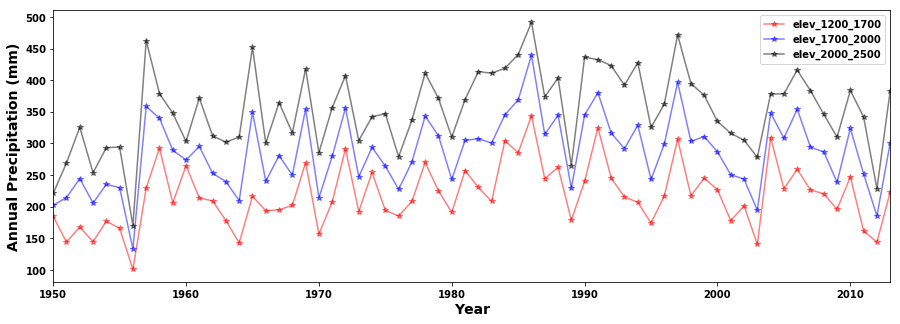

In [15]:
# print annual precipitation by elevation bands
P_fig1 = plt.figure(figsize=(15, 5))
fontdict = {'fontsize': 14, 'weight': 'bold'}
ax4 = P_fig1.add_subplot(111)
ax4.plot((ltm_low['meanyear_PRECIP_dailymet_livneh2015']*365./bc_low), 'r-*', label = 'elev_1200_1700', alpha=0.5)
ax4.plot((ltm_mid['meanyear_PRECIP_dailymet_livneh2015']*365./bc_mid), 'b-*', label = 'elev_1700_2000', alpha=0.5)
ax4.plot((ltm_high['meanyear_PRECIP_dailymet_livneh2015']*365./bc_high), 'k-*', label = 'elev_2000_2500', alpha=0.5)
plt.xlim([1950, 2013])
plt.ylabel('Annual Precipitation (mm)', fontdict=fontdict)
plt.xlabel('Year', fontdict=fontdict)
plt.xticks(np.arange(1950, 2013, step=10), fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend(prop={'weight':'bold'})
plt.show()

** 3.1.6 Print mean monthly temperature by elevation bands **

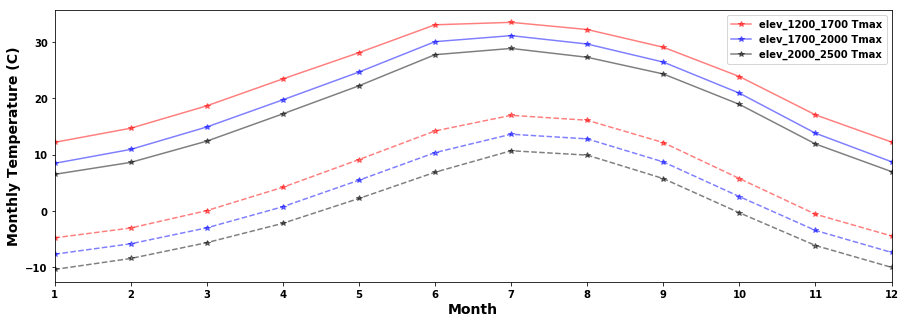

In [16]:
T_fig2 = plt.figure(figsize=(15, 5))
ax4 = T_fig2.add_subplot(111)
ax4.plot(ltm_low['meanmonth_TMAX_dailymet_livneh2015'],'r-*', label = 'elev_1200_1700 Tmax', alpha=0.5)
ax4.plot(ltm_mid['meanmonth_TMAX_dailymet_livneh2015'],'b-*', label = 'elev_1700_2000 Tmax', alpha=0.5)
ax4.plot(ltm_high['meanmonth_TMAX_dailymet_livneh2015'],'k-*', label = 'elev_2000_2500 Tmax', alpha=0.5)

ax4.plot(ltm_low['meanmonth_TMIN_dailymet_livneh2015'],'r--*', label = 'elev_1200_1700 Tmax', alpha=0.5)
ax4.plot(ltm_mid['meanmonth_TMIN_dailymet_livneh2015'],'b--*', label = 'elev_1700_2000 Tmax', alpha=0.5)
ax4.plot(ltm_high['meanmonth_TMIN_dailymet_livneh2015'],'k--*', label = 'elev_2000_2500 Tmax', alpha=0.5)

plt.xlim([1, 12])
plt.ylabel('Monthly Temperature (C)', fontdict=fontdict)
plt.xlabel('Month', fontdict=fontdict)
plt.xticks(np.arange(1, 13, step=1), fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend(prop={'weight':'bold'})
plt.show()

** 3.1.7 Tiling of data - Extension of meteorological records by repeating available data**

The meteorological data downloaded from Livneh extends from year 1950 through 2013, for a total of 64 years. Some shrubs in this area can live up to 600 years and trees up to 300 years. Therefore, we need a longer record (at least 2000 years) to evolve interesting vegetation patterns from a random initial condition using Landlab's ecohydrology model. To circumvent this issue, we can tile data (repeat the array of data multiple times).

In [17]:
# Tiling meteorological data to extend the record to approximately 9.5k yrs.
P_met_low = np.tile(P_met_low, 150)
P_met_mid = np.tile(P_met_mid, 150)
P_met_high = np.tile(P_met_high, 150)

Tmax_met_low = np.tile(Tmax_met_low.values, 150)
Tmax_met_mid = np.tile(Tmax_met_mid.values, 150)
Tmax_met_high = np.tile(Tmax_met_high.values, 150)

Tmin_met_low = np.tile(Tmin_met_low.values, 150)
Tmin_met_mid = np.tile(Tmin_met_mid.values, 150)
Tmin_met_high = np.tile(Tmin_met_high.values, 150)

## 4. Ecohydrology Modeling using Landlab

Now, we will initialize Landlab raster grids (instances of Landlab's RasterModelGrid), that represent the hypothetical watersheds on which we are going to experiment, for each elevation band.

** 4.1.1 Initialize Landlab grids **

In [18]:
grid_low = rmg((100, 100), spacing=(5., 5.))
grid_mid = rmg((100, 100), spacing=(5., 5.))
grid_high = rmg((100, 100), spacing=(5., 5.))

** 4.1.2 Import parameters from a file **

Each component used in this model accept input parameters as arguments. All these input parameters can be included in a single '.yaml' file and passed along through the function 'run_ecohydrology_model', where each component is initialized. For this exercise, we have calibrated the model and included the inputs in the file 'ecohyd_inputs.yaml', which is available in the subfolder 'supporting_files'.

In [19]:
InputFile = 'supporting_files/ecohyd_inputs.yaml'

Let us also prepare 'input_data' dictionaries with meteorological inputs.

In [20]:
input_data_low = {'precip_met': P_met_low,
                  'Tmax_met': Tmax_met_low,
                  'Tmin_met': Tmin_met_low}
input_data_mid = {'precip_met': P_met_mid,
                  'Tmax_met': Tmax_met_mid,
                  'Tmin_met': Tmin_met_mid}
input_data_high = {'precip_met': P_met_high,
                  'Tmax_met': Tmax_met_high,
                  'Tmin_met': Tmin_met_high}

** 4.1.3  Initialize 'vegetation__plant_functional_type' field with a random array. **

Once the grid has been initialized, we need to initialize the PFT field 'vegetation__plant_functional_type' (cellular field; refer documentation for fields in Landlab for more information). If we don't initialize it, a random initial condition is chosen. For now, let us initialize each grid with a random distribution of PFTs.


In [21]:
grid_low.at_cell['vegetation__plant_functional_type'] = np.random.randint(0, 6, size=grid_low.number_of_cells)
grid_mid.at_cell['vegetation__plant_functional_type'] = np.random.randint(0, 6, size=grid_mid.number_of_cells)
grid_high.at_cell['vegetation__plant_functional_type'] = np.random.randint(0, 6, size=grid_high.number_of_cells)

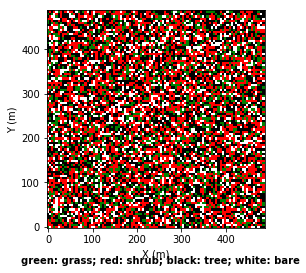

In [22]:
# Plot initial vegetation PFT state
from landlab.plot import imshow_grid
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(
            ['green', 'red', 'black', 'white', 'red', 'black'])
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
description = 'green: grass; red: shrub; black: tree; white: bare'
plt.figure(101)
imshow_grid(grid_low, 'vegetation__plant_functional_type', values_at='cell', cmap=cmap,
            grid_units=('m', 'm'), norm=norm, limits=[0, 5],
            allow_colorbar=False)
caption = plt.figtext(0.2, 0.0, description, weight='bold', fontsize=10)

** 4.1.4  Run ecohydrology model. **

We can run the model for the entire length of the tiled meteorological records but it might take a long time for the model to run. For demonstration purposes, we will run the simulation for approximately 250 years for each elevation band.

In [23]:
# new number of storms
n = 100000  # approximately 250 years

Let us run the model now!

**Low elevation band:**

In [24]:
(VegType_low, yrs_low, debug_low) = run_ecohydrology_model(grid_low, 
                                                           input_data=input_data_low,
                                                           input_file=InputFile,
                                                           synthetic_storms=False,
                                                           number_of_storms=n,
                                                           pet_method='PriestleyTaylor')

Elapsed time =  0  years
Elapsed time =  100  years
Elapsed time =  200  years


**Mid elevation band:**

In [25]:
(VegType_mid, yrs_mid, debug_mid) = run_ecohydrology_model(grid_mid, 
                                                           input_data=input_data_mid,
                                                           input_file=InputFile,
                                                           synthetic_storms=False,
                                                           number_of_storms=n,
                                                           pet_method='PriestleyTaylor')

Elapsed time =  0  years
Elapsed time =  100  years
Elapsed time =  200  years


**High elevation band**

In [26]:
(VegType_high, yrs_high, debug_high) = run_ecohydrology_model(grid_high,
                                                              input_data=input_data_high,
                                                              input_file=InputFile,
                                                              synthetic_storms=False,
                                                              number_of_storms=n,
                                                              pet_method='PriestleyTaylor')

Elapsed time =  0  years
Elapsed time =  100  years
Elapsed time =  200  years



** 4.1.3  Look at results. **

Plots of the cellular field of PFT at specified year step can be found below where:

GRASS = green; SHRUB = red; TREE = black; BARE = white;

At the end, percentage cover of each PFT is plotted with respect to time.

**Low elevation band:**

Plotting cellular field of Plant Functional Type
Green - Grass; Red - Shrubs; Black - Trees; White - Bare


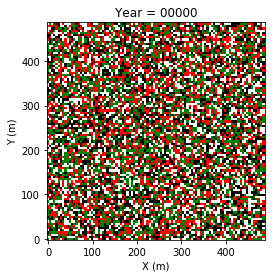

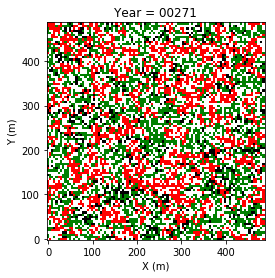

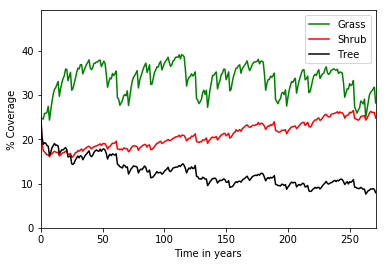

In [27]:
plot_results(grid_low, VegType_low, yrs_low, yr_step=yrs_low-1)
plt.savefig('grid_low.png')

**Mid elevation band:**

Plotting cellular field of Plant Functional Type
Green - Grass; Red - Shrubs; Black - Trees; White - Bare


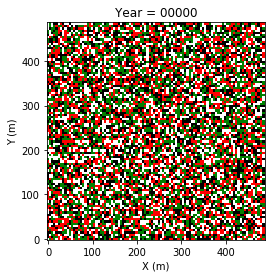

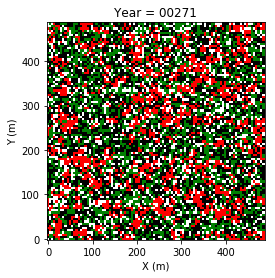

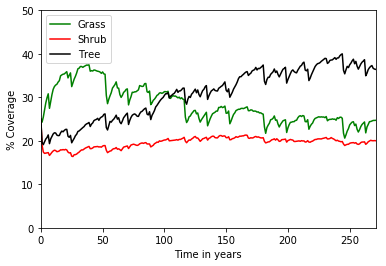

In [28]:
plot_results(grid_mid, VegType_mid, yrs_mid, yr_step=yrs_mid-1)
plt.savefig('grid_mid.png')

**High elevation band:**

Plotting cellular field of Plant Functional Type
Green - Grass; Red - Shrubs; Black - Trees; White - Bare


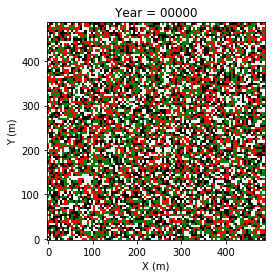

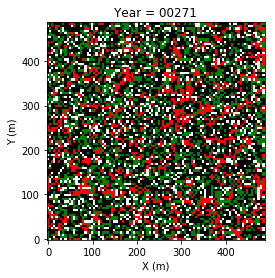

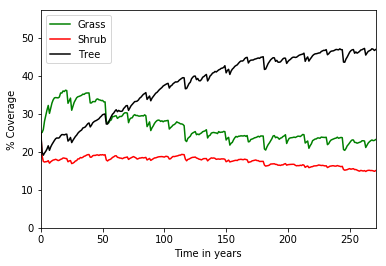

In [29]:
plot_results(grid_high, VegType_high, yrs_high, yr_step=yrs_high-1)
plt.savefig('grid_high.png')

** 4.1.4  Discussion. **

By comparing the plots for percentage coverage with respect to time, we can clearly observe differences in vegetation patterns in landscapes with varied climatology. A wetter climate (high elevation) favors a tree grass savanna, where as low elevation semi-arid landscape is dominated by shrubs that are more drought resistant then the other species in contention.

If you want to explore this model further, open 'ecohyd_inputs.yaml' and change the input parameters (e.g., initial PFT distribution percentages, soil properties, PFT properties, etc..).

### Click here for more <a href="https://github.com/landlab/landlab/wiki/Tutorials">Landlab tutorials</a>